# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 613


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [15]:
# Set the API base URL
base_url = f"https://api.openweathermap.org/data/2.5/weather?&appid={weather_api_key}&units=metric"

# Define an empty list to fetch the weather data for each city
city_data = []
city_lat = []
city_lng = []
city_max_temp = []
city_humidity = []
city_clouds = []
city_wind = []
city_country = []
city_date = []


# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = base_url + "&q=" + city
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']


        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | enewetak
Processing Record 2 of Set 1 | adamstown
Processing Record 3 of Set 1 | port elizabeth
Processing Record 4 of Set 1 | mata-utu
Processing Record 5 of Set 1 | keflavik
Processing Record 6 of Set 1 | tura
Processing Record 7 of Set 1 | klaksvik
Processing Record 8 of Set 1 | wailua homesteads
Processing Record 9 of Set 1 | kerikeri
Processing Record 10 of Set 1 | port mathurin
Processing Record 11 of Set 1 | viligili
City not found. Skipping...
Processing Record 12 of Set 1 | isafjordur
Processing Record 13 of Set 1 | horta
Processing Record 14 of Set 1 | oamaru
Processing Record 15 of Set 1 | vilyuchinsk
Processing Record 16 of Set 1 | albany
Processing Record 17 of Set 1 | edinburgh of the seven seas
Processing Record 18 of Set 1 | acapulco de juarez
Processing Record 19 of Set 1 | waitangi
Processing Record 20 of Set 1 | stanley
Processing Record 21 of Set 1 | east london
Processing Rec

KeyboardInterrupt: 

In [17]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          66
Lat           66
Lng           66
Max Temp      66
Humidity      66
Cloudiness    66
Wind Speed    66
Country       66
Date          66
dtype: int64

In [19]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,enewetak,11.3474,162.3373,27.24,66,96,10.46,MH,1740331254
1,adamstown,-25.0660,-130.1015,25.18,73,8,3.41,PN,1740331014
2,port elizabeth,-33.9180,25.5701,21.84,96,40,3.09,ZA,1740331197
3,mata-utu,-13.2816,-176.1745,28.39,78,100,10.71,WF,1740331257
4,keflavik,64.0049,-22.5624,5.24,93,75,5.66,IS,1740331258


In [21]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [23]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,enewetak,11.3474,162.3373,27.24,66,96,10.46,MH,1740331254
1,adamstown,-25.0660,-130.1015,25.18,73,8,3.41,PN,1740331014
2,port elizabeth,-33.9180,25.5701,21.84,96,40,3.09,ZA,1740331197
3,mata-utu,-13.2816,-176.1745,28.39,78,100,10.71,WF,1740331257
4,keflavik,64.0049,-22.5624,5.24,93,75,5.66,IS,1740331258


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

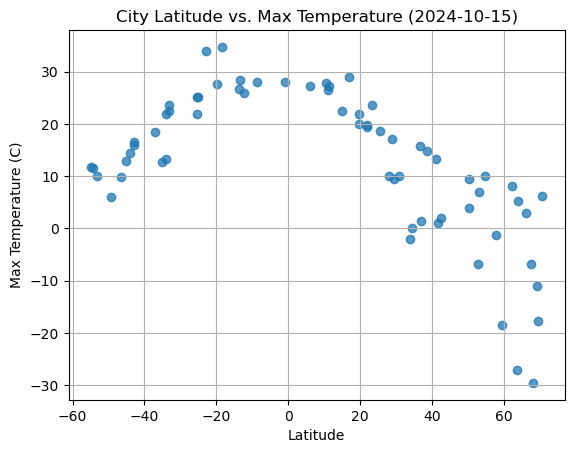

In [32]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values, y_values, alpha = 0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (2024-10-15)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

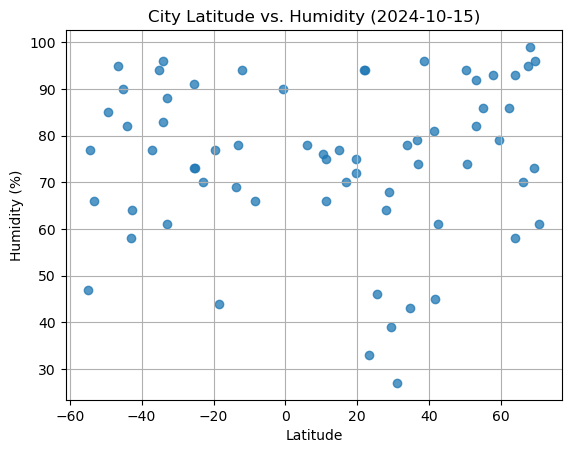

In [34]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values, y_values, alpha = 0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2024-10-15)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

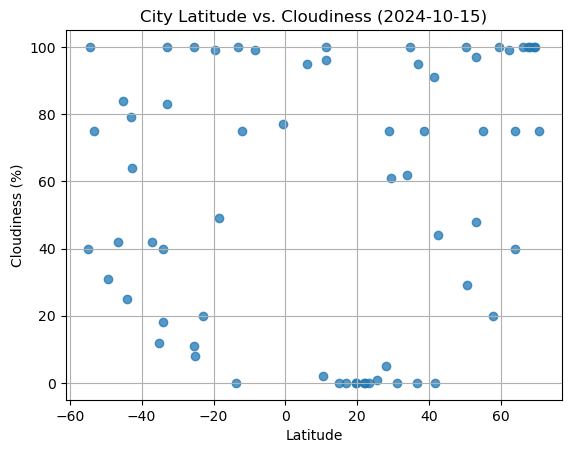

In [36]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values, y_values, alpha = 0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2024-10-15)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

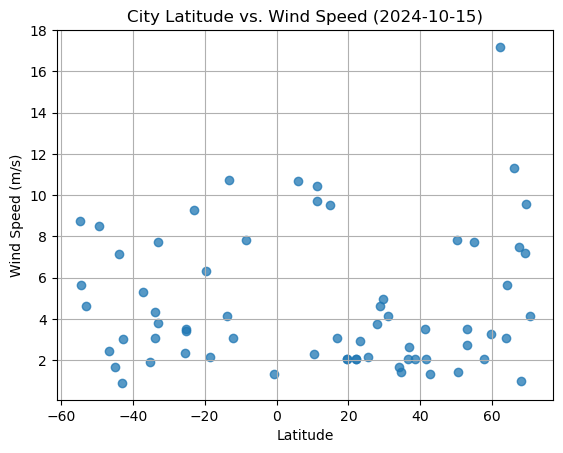

In [38]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values, y_values, alpha = 0.75)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed (2024-10-15)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [40]:
# Define a function to create Linear Regression plots
def LinearRegressionPlot(x_values, y_values, x_label, y_label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_eq = x_values * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_eq, "r-")
    print(line_eq)
    print(f"The r-square is {rvalue}")
    plt.annotate(line_eq, fontsize = 14, color = "red")
    plt.xlabel("Latitude")
    plt.ylabel(f"{y_label}")
    plt.grid()
    plt.show()

In [42]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] > 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,enewetak,11.3474,162.3373,27.24,66,96,10.46,MH,1740331254
4,keflavik,64.0049,-22.5624,5.24,93,75,5.66,IS,1740331258
5,tura,25.5198,90.2201,18.72,46,1,2.13,IN,1740331259
6,klaksvik,62.2266,-6.5890,8.20,86,99,17.19,FO,1740331260
7,wailua homesteads,22.0669,-159.3780,19.44,94,0,2.06,US,1740331262


In [50]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head() 

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,adamstown,-25.0660,-130.1015,25.18,73,8,3.41,PN,1740331014
2,port elizabeth,-33.9180,25.5701,21.84,96,40,3.09,ZA,1740331197
3,mata-utu,-13.2816,-176.1745,28.39,78,100,10.71,WF,1740331257
8,kerikeri,-35.2268,173.9474,12.63,94,12,1.89,NZ,1740331263
9,port mathurin,-19.6833,63.4167,27.61,77,99,6.33,MU,1740331264


###  Temperature vs. Latitude Linear Regression Plot

y = -0.61x + 32.24
The r-square is -0.8162977872606643
The r^2-value is: -0.8162977872606643


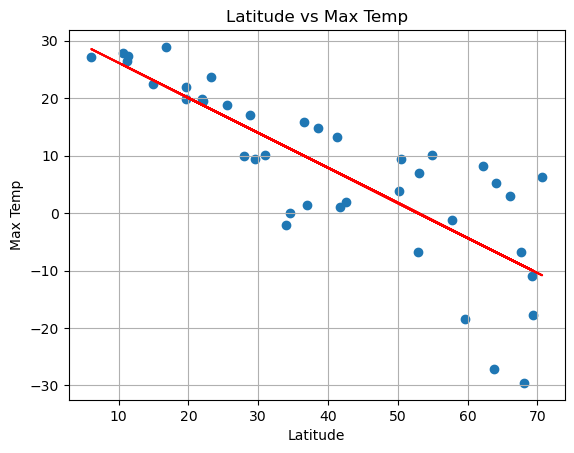

In [54]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_eq = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_eq, "r-")
print(line_eq)
print(f"The r-square is {rvalue}")
plt.annotate(line_eq, xy=(0, max(y_values)), fontsize=14, color="red")
plt.title("Latitude vs Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.grid()
print(f"The r^2-value is: {rvalue}")
plt.show()

y = 0.45x + 34.6
The r-square is 0.862242069514109
The r^2-value is: 0.862242069514109


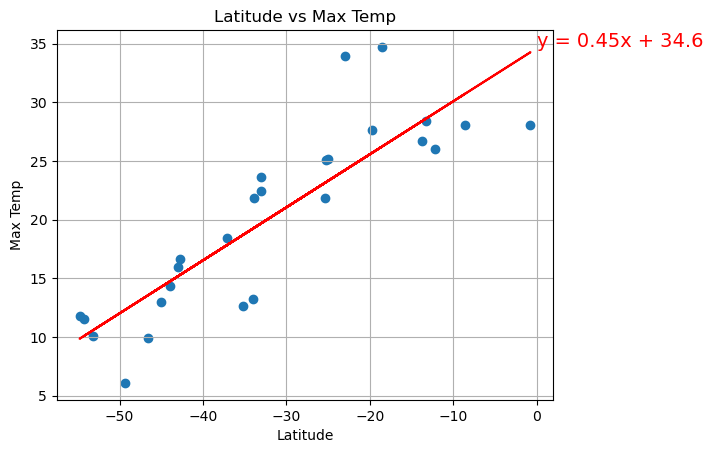

In [58]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_eq = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_eq, "r-")
print(line_eq)
print(f"The r-square is {rvalue}")
plt.annotate(line_eq, xy=(0, max(y_values)), fontsize=14, color="red")
plt.title("Latitude vs Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.grid()
print(f"The r^2-value is: {rvalue}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

y = 0.28x + 62.27
The r-square is 0.3016337028451538
The r^2-value is: 0.3016337028451538


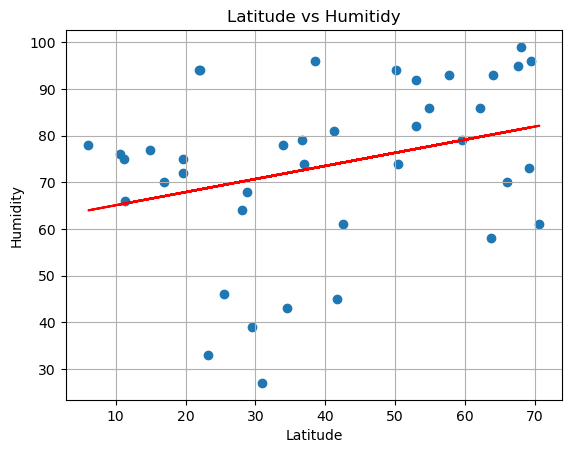

In [62]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_eq = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_eq, "r-")
print(line_eq)
print(f"The r-square is {rvalue}")
plt.annotate(line_eq, xy=(0, max(y_values)), fontsize=14, color="red")
plt.title("Latitude vs Humitidy")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid()
print(f"The r^2-value is: {rvalue}")
plt.show()

y = 0.08x + 78.85
The r-square is 0.07898256526981359
The r^2-value is: 0.07898256526981359


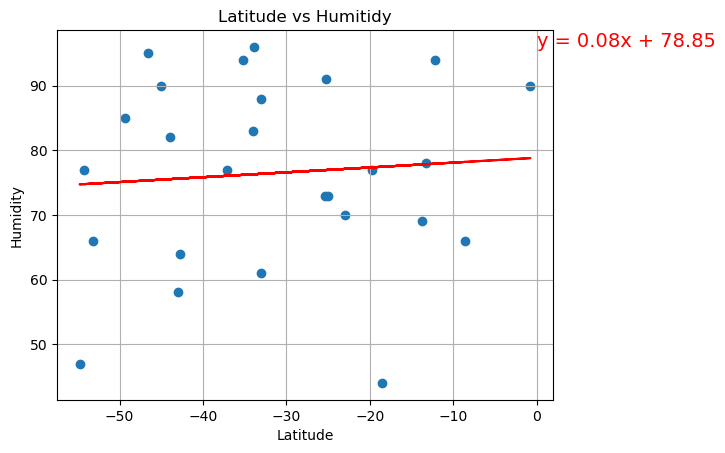

In [64]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_eq = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_eq, "r-")
print(line_eq)
print(f"The r-square is {rvalue}")
plt.annotate(line_eq, xy=(0, max(y_values)), fontsize=14, color="red")
plt.title("Latitude vs Humitidy")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid()
print(f"The r^2-value is: {rvalue}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

y = 1.04x + 12.1
The r-square is 0.48543251780837193
The r^2-value is: 0.48543251780837193


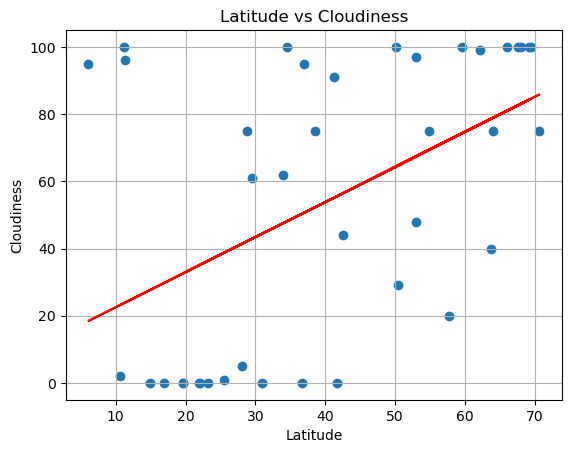

In [66]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_eq = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_eq, "r-")
print(line_eq)
print(f"The r-square is {rvalue}")
plt.annotate(line_eq, xy=(0, max(y_values)), fontsize=14, color="red")
plt.title("Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid()
print(f"The r^2-value is: {rvalue}")
plt.show()

y = 0.2x + 62.97
The r-square is 0.08790012635953297
The r^2-value is: 0.08790012635953297


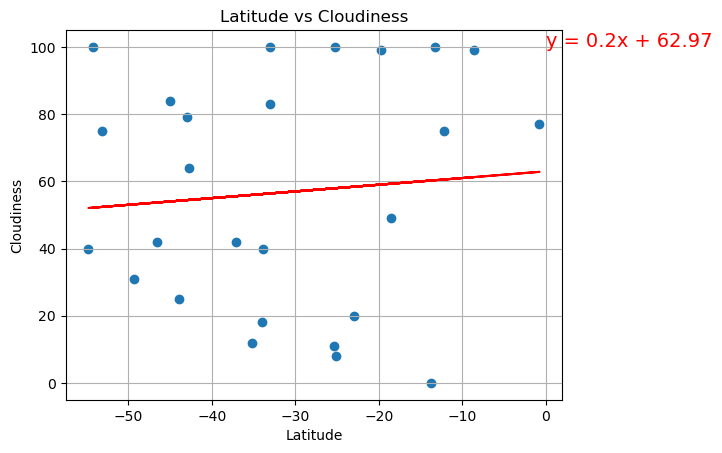

In [68]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_eq = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_eq, "r-")
print(line_eq)
print(f"The r-square is {rvalue}")
plt.annotate(line_eq, xy=(0, max(y_values)), fontsize=14, color="red")
plt.title("Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid()
print(f"The r^2-value is: {rvalue}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

y = 0.02x + 3.84
The r-square is 0.11757086896354285
The r^2-value is: 0.11757086896354285


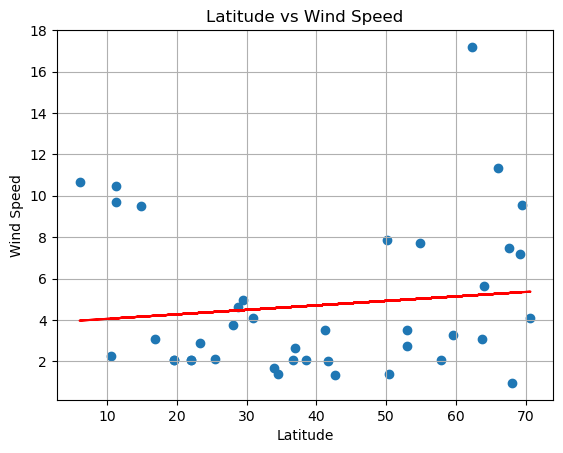

In [70]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_eq = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_eq, "r-")
print(line_eq)
print(f"The r-square is {rvalue}")
plt.annotate(line_eq, xy=(0, max(y_values)), fontsize=14, color="red")
plt.title("Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid()
print(f"The r^2-value is: {rvalue}")
plt.show()

y = -0.01x + 4.53
The r-square is -0.03335090990977983
The r^2-value is: -0.03335090990977983


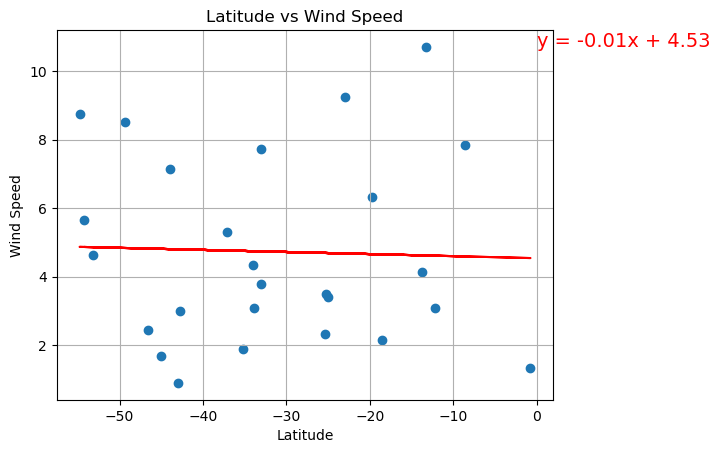

In [72]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_eq = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_eq, "r-")
print(line_eq)
print(f"The r-square is {rvalue}")
plt.annotate(line_eq, xy=(0, max(y_values)), fontsize=14, color="red")
plt.title("Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid()
print(f"The r^2-value is: {rvalue}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE